In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from tfumap.paths import MODEL_DIR

In [6]:
dataset = 'cifar10'

In [39]:
from tfumap.load_datasets import load_CIFAR10, mask_labels

In [40]:
X_train, X_test, X_valid, Y_train, Y_test, Y_valid = load_CIFAR10(flatten=False)
X_train.shape

(40000, 32, 32, 3)

In [34]:
loc_df = pd.DataFrame([
    [1, 'cifar10_1.0_1024_1____2020_08_06_21_42_37_899879__learned-metric_augmented'],
    [4, 'cifar10_1.0_1024_4____2020_08_06_15_59_01_968264__learned-metric_augmented'],
    [16, 'cifar10_1.0_1024_16____2020_08_07_08_46_10_018839__learned-metric_augmented'],
    [64, 'cifar10_1.0_1024_64____2020_08_06_15_39_53_929135__learned-metric_augmented'],
    [256, 'cifar10_1.0_1024_256____2020_08_06_16_00_22_032853__learned-metric_augmented'],
    [512, 'cifar10_1.0_1024_1024____2020_08_06_15_55_57_912075__learned-metric_augmented'],
], columns = ['dims', 'loc_'])
loc_df

,dims,loc_
0,1,cifar10_1.0_1024_1____2020_08_06_21_42_37_8998...
1,4,cifar10_1.0_1024_4____2020_08_06_15_59_01_9682...
2,16,cifar10_1.0_1024_16____2020_08_07_08_46_10_018...
3,64,cifar10_1.0_1024_64____2020_08_06_15_39_53_929...
4,256,cifar10_1.0_1024_256____2020_08_06_16_00_22_03...
5,512,cifar10_1.0_1024_1024____2020_08_06_15_55_57_9...


In [35]:
loc_df['z'] = 1
loc_df['z'] = loc_df['z'].astype(object)
for idx, row in loc_df.iterrows():
    cpt_path = MODEL_DIR / 'semisupervised' / dataset / row.loc_
    last_layer_class = cpt_path / 'train_last_layer_class.npy'
    z_enc = cpt_path / 'train_z_enc.npy'
    umap_class = np.load(cpt_path / 'train_last_layer_class_umap.npy')
    loc_df.loc[idx, 'z']  = [umap_class]

In [36]:
loc_df

,dims,loc_,z
0,1,cifar10_1.0_1024_1____2020_08_06_21_42_37_8998...,"[[0.69136834, -2.9473631], [-3.3928876, 13.595..."
1,4,cifar10_1.0_1024_4____2020_08_06_15_59_01_9682...,"[[-3.6909385, 9.298148], [11.063008, 7.253611]..."
2,16,cifar10_1.0_1024_16____2020_08_07_08_46_10_018...,"[[7.8624573, 3.721109], [17.714596, 6.5223427]..."
3,64,cifar10_1.0_1024_64____2020_08_06_15_39_53_929...,"[[-3.3407202, -4.208916], [-4.63196, 5.954229]..."
4,256,cifar10_1.0_1024_256____2020_08_06_16_00_22_03...,"[[2.9968913, 11.019194], [5.099784, 0.48227957..."
5,512,cifar10_1.0_1024_1024____2020_08_06_15_55_57_9...,"[[16.362883, 5.0279627], [-7.3787107, 2.606486..."


In [37]:
from scipy.spatial import procrustes

In [70]:
from tfumap.paths import FIGURE_DIR, save_fig, ensure_dir

In [50]:
z0 = loc_df.loc[5, 'z']

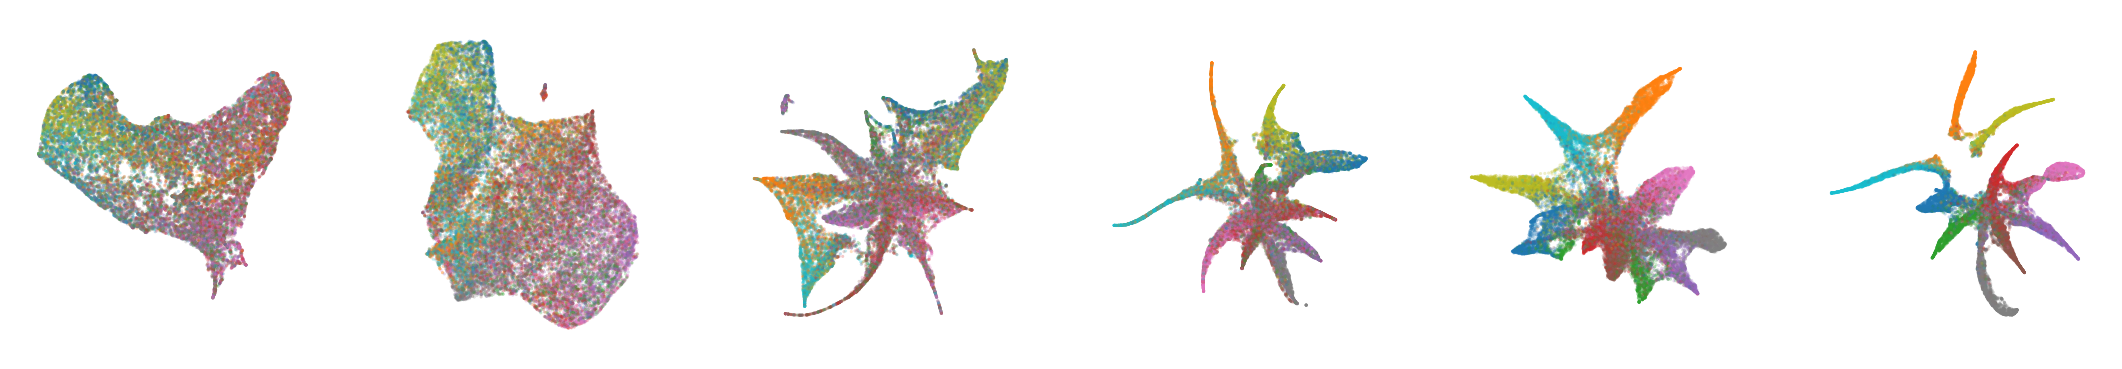

In [71]:
fig, axs = plt.subplots(ncols=6, figsize=(18, 3), dpi=150)
for i, (idx, row) in enumerate(loc_df.iterrows()):
    z = row.z
    z0_align, z_align, disparity = procrustes(z0, z)
    ax = axs[i]
    ax.scatter(
        z_align[:, 0], 
        z_align[:, 1], 
        s=0.25,
        c=Y_train, 
        cmap=plt.cm.tab10, 
        alpha = 0.25
    )
    ax.axis("equal")
    n = 0.1
    xmin = np.percentile(z_align[:, 0], n)
    xmax = np.percentile(z_align[:, 0], 100 - n)
    ymin = np.percentile(z_align[:, 1], n)
    ymax = np.percentile(z_align[:, 1], 100 - n)
    # print(xmin, xmax, xmin, ymax)
    xdiff = (xmax - xmin) / 10
    ydiff = (ymax - ymin) / 10
    xmin = xmin - xdiff
    xmax = xmax + xdiff
    ymin = ymin - ydiff
    ymax = ymax + ydiff

    # print(xmin, xmax, xmin, ymax)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])

    ax.axis("off")
ensure_dir(FIGURE_DIR / 'semisupervised-projections')
save_fig(FIGURE_DIR / 'semisupervised-projections' / 'cifar10-learned-metric-with-augment', save_pdf=True)